# **Breast Cancer Classification-Machine Learning Approach**
Author : Naftalia Sophiana Purba

# Load Data

In [1]:
# Import library
import numpy as np
import pandas as pd

# Load the dataset breast cancer from scikit-learn
from sklearn import datasets
cancer = datasets.load_breast_cancer()
X = cancer.data       # Features
Y = cancer.target     # Labels

# Convert to pandas dataframe
df_X = pd.DataFrame(X, columns=cancer.feature_names)
df_Y = pd.DataFrame(Y, columns=['label'])
df = pd.concat([df_X, df_Y], axis=1)
df.head(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0


# Data Exploration

In [2]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns

Data Information

In [3]:
df.shape

(569, 31)

In [4]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

In [5]:
df.label.unique()

array([0, 1])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


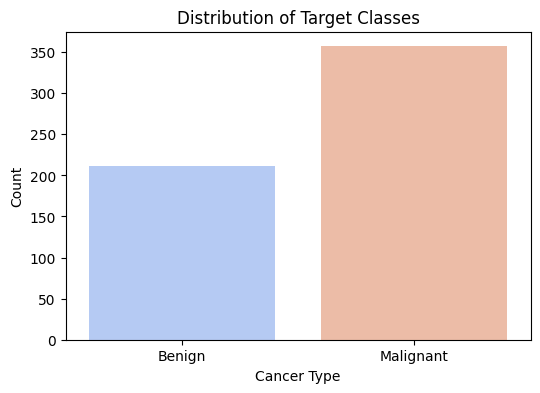

In [8]:
# Class distribution plot
plt.figure(figsize=(6,4))
sns.countplot(x="label", data=df, hue="label", palette="coolwarm", legend=False)
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.title("Distribution of Target Classes")
plt.xlabel("Cancer Type")
plt.ylabel("Count")
plt.show()

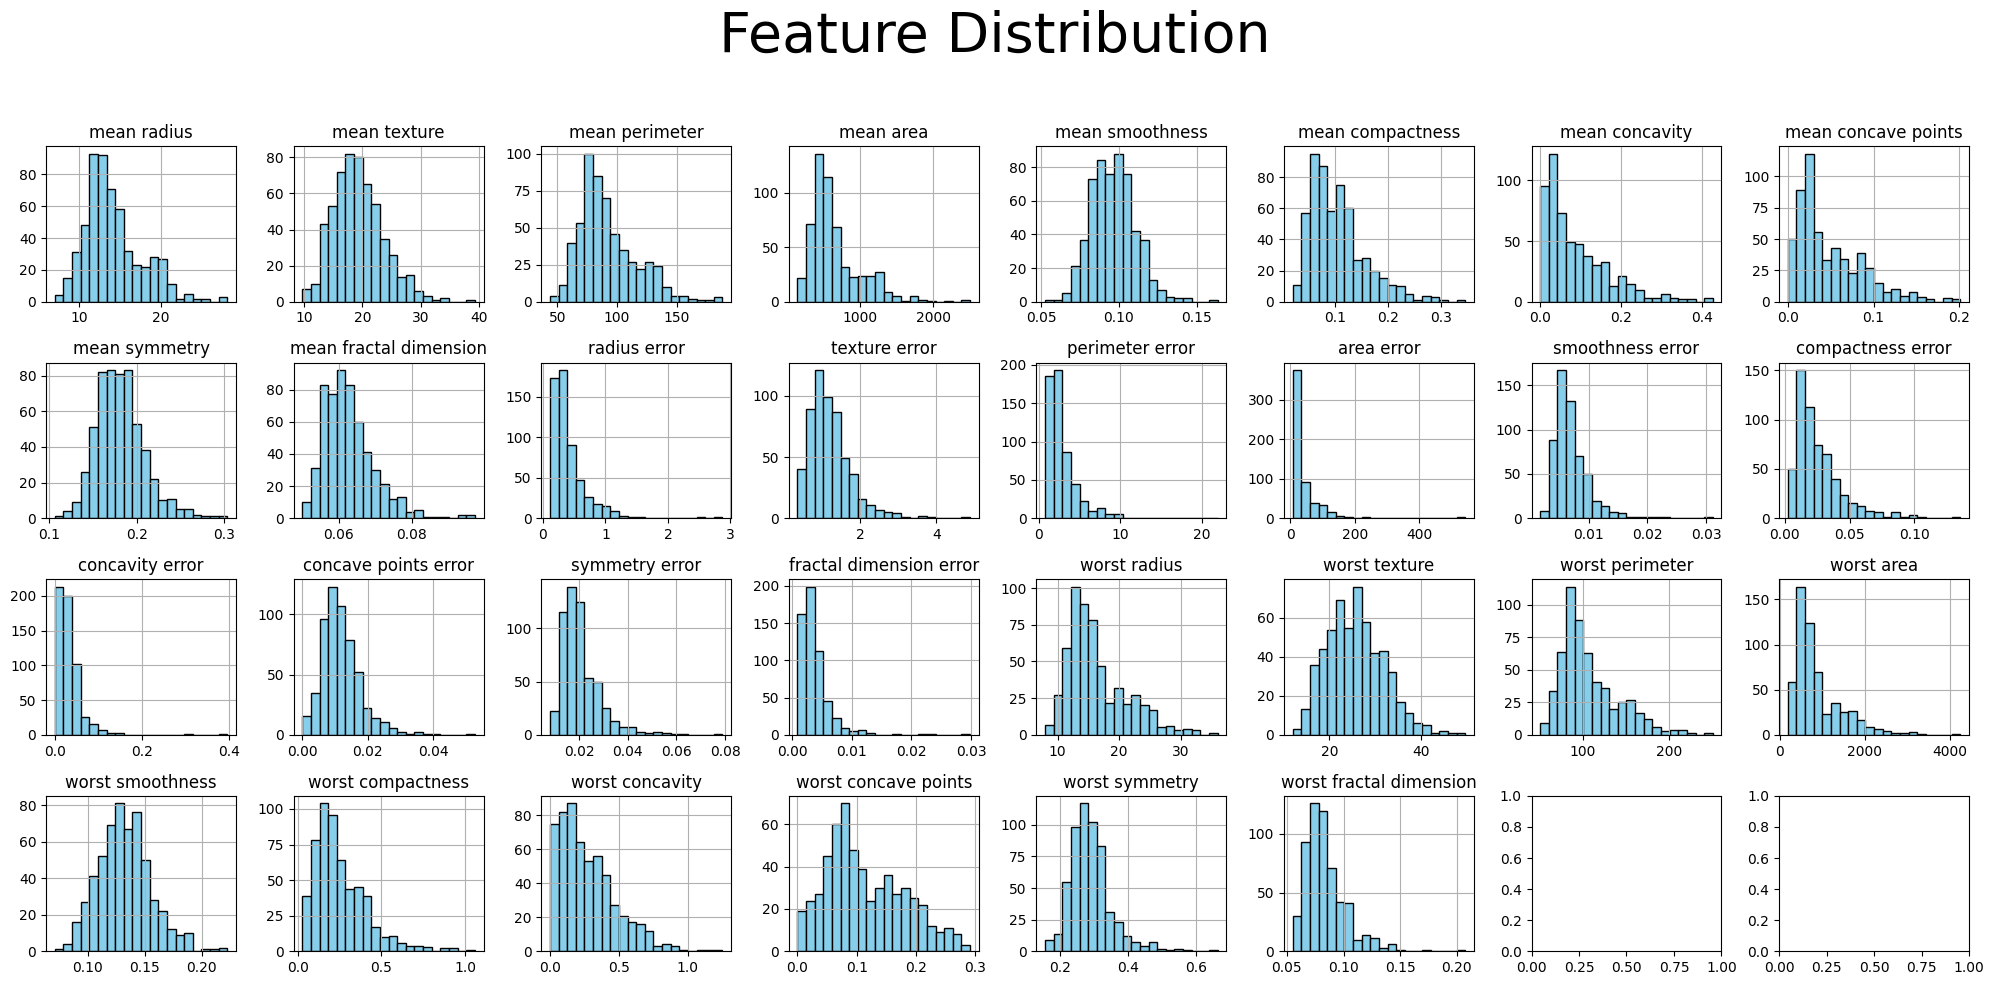

In [9]:
# Specifies the number of rows and columns for the subplot.
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(20, 10)) # 6 rows 5 columns
fig.suptitle("Feature Distribution", fontsize=40)

# Flatten axes to simplify iteration
axes = axes.flatten()

# Histogram plot for features
for i, column in enumerate(df.columns[:30]):  # Pilih 10 fitur pertama
    df[column].hist(ax=axes[i], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(column)

# Adjust the layout so that subplots do not stick together
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

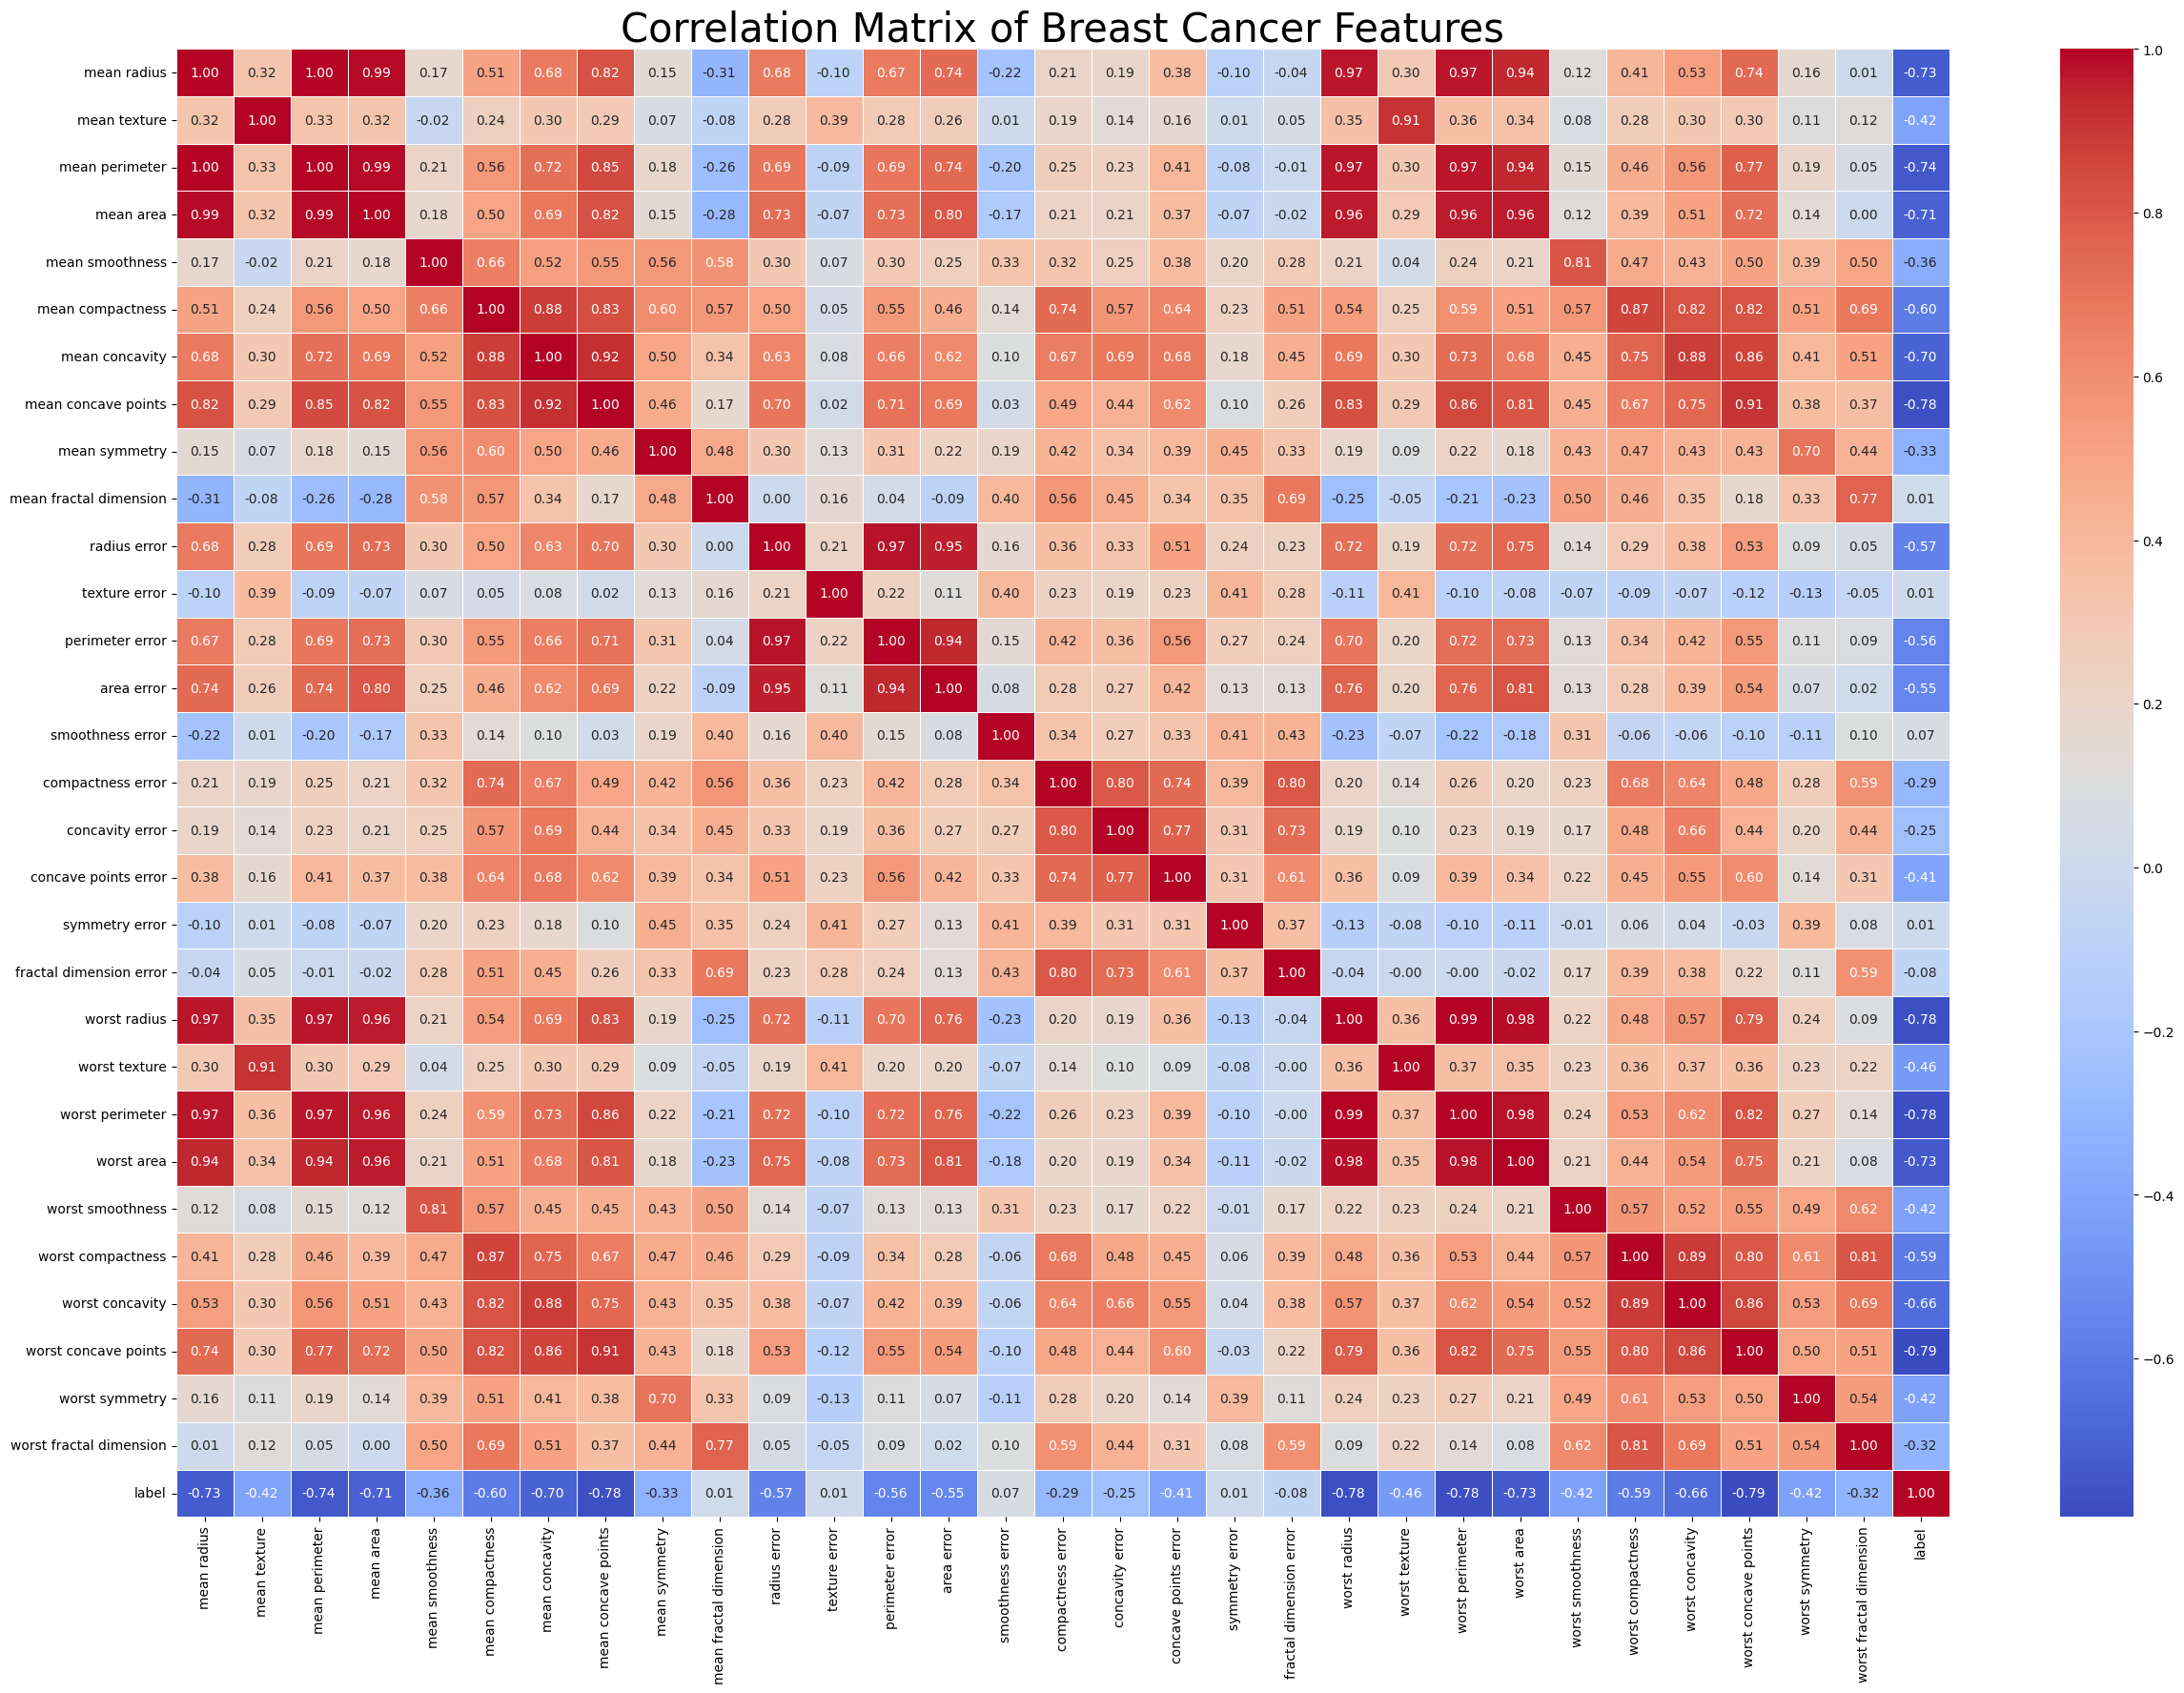

In [10]:
# Correlation
corr_matrix = df.corr()

# Correlation plot
plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Breast Cancer Features', fontsize=30)
plt.show()

# Data Preprocessing

Spliting Data

In [11]:
# Import library
from sklearn.model_selection import train_test_split

In [12]:
# Split data into training and testing test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (455, 30)
Shape of test set: (114, 30)


Feature Scalling (Normalization/Standarization)

In [13]:
# Import library
from sklearn.preprocessing import StandardScaler

In [14]:
# Standarizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit and transform the training data
X_test = scaler.transform(X_test)         # Transform the test data

# Classification & Evaluation Model

In [15]:
# Import library
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Support Vector Machine (SVM)

In [16]:
# Import library
from sklearn.svm import SVC

Model Training

In [17]:
# Model training
svm = SVC(kernel='rbf')
svm.fit(X_train, Y_train)

SVC()

In [18]:
# Make predictions using the test set
Y_pred_svm= svm.predict(X_test)

Evaluation

In [19]:
# Calculate accuracy of the model
svm_accuracy = accuracy_score(Y_test, Y_pred_svm)
print(f'Model Accuracy of SVM: {svm_accuracy:.2f} = {svm_accuracy * 100:.2f}%')

Model Accuracy of SVM: 0.98 = 98.25%


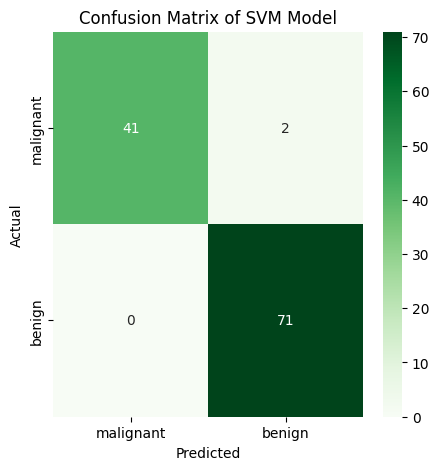

In [20]:
# Confusion matrix
cm = confusion_matrix(Y_test,Y_pred_svm)

# Display the confusion matix using Seaborn heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of SVM Model')
plt.show()

In [21]:
# Classification report
svm_report = classification_report(Y_test, Y_pred_svm,  output_dict=True)
svm_report_df = pd.DataFrame(svm_report).transpose()
print("Classification Report of SVM:")
display(svm_report_df)

Classification Report of SVM:


,precision,recall,f1-score,support
0,1.000000,0.953488,0.976190,43.000000
1,0.972603,1.000000,0.986111,71.000000
accuracy,0.982456,0.982456,0.982456,0.982456
macro avg,0.986301,0.976744,0.981151,114.000000
weighted avg,0.982937,0.982456,0.982369,114.000000


## 2. Logistic Regression

In [22]:
# Import librray
from sklearn.linear_model import LogisticRegression

Model training

In [23]:
# Model training
logreg = LogisticRegression(solver='liblinear', random_state=42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [24]:
# Make predictions using the test data
Y_pred_logreg = logreg.predict(X_test)

Evaluation

In [25]:
# Model accuracy
logreg_accuracy = accuracy_score(Y_test, Y_pred_logreg)
print(f'Model Accuracy of Logistic Regression: {logreg_accuracy:.2f} = {logreg_accuracy * 100:.2f}%')

Model Accuracy of Logistic Regression: 0.97 = 97.37%


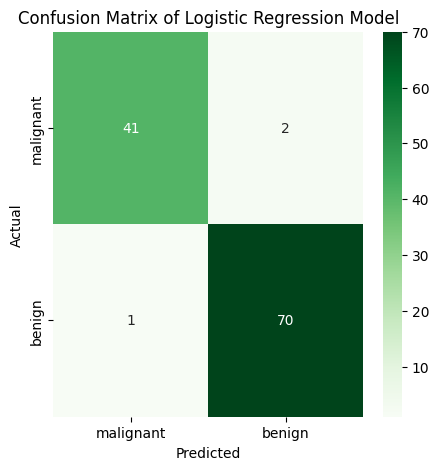

In [26]:
# Confusion matrix
cm = confusion_matrix(Y_test,Y_pred_logreg)

# Display the confusion matix using Seaborn heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression Model')
plt.show()

In [27]:
# Classification report
logreg_report = classification_report(Y_test, Y_pred_logreg,  output_dict=True)
logreg_report_df = pd.DataFrame(logreg_report).transpose()
print("Classification Report of Logistic Regression:")
display(logreg_report_df)

Classification Report of Logistic Regression:


,precision,recall,f1-score,support
0,0.976190,0.953488,0.964706,43.000000
1,0.972222,0.985915,0.979021,71.000000
accuracy,0.973684,0.973684,0.973684,0.973684
macro avg,0.974206,0.969702,0.971863,114.000000
weighted avg,0.973719,0.973684,0.973621,114.000000


# 3. Random Forest

In [28]:
# Import library
from sklearn.ensemble import RandomForestClassifier

Model Training

In [29]:
# Model training
rf = RandomForestClassifier(n_estimators=7, random_state=42)
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=7, random_state=42)

In [30]:
# Make prediction using the tes set
Y_pred_rf = rf.predict(X_test)

Evaluation

In [31]:
# Model accuracy
rf_accuracy = accuracy_score(Y_test, Y_pred_rf)
print(f'Model Accuracy of Random Forest: {rf_accuracy:.2f} = {rf_accuracy * 100:.2f}%')

Model Accuracy of Random Forest: 0.95 = 94.74%


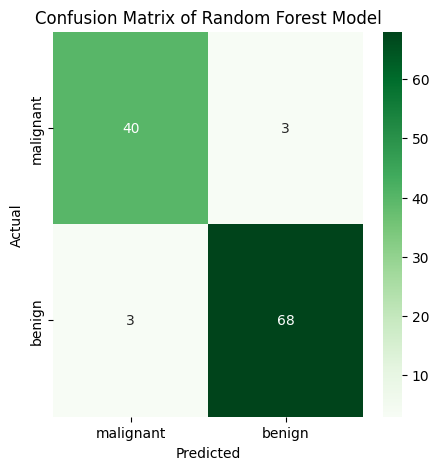

In [32]:
# Confusion matrix
cm = confusion_matrix(Y_test,Y_pred_rf)

# Display the confusion matix using Seaborn heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Random Forest Model')
plt.show()

In [33]:
# Classification report
rf_report = classification_report(Y_test, Y_pred_rf,  output_dict=True)
rf_report_df = pd.DataFrame(rf_report).transpose()
print("Classification Report of Random Forest:")
display(rf_report_df)

Classification Report of Random Forest:


,precision,recall,f1-score,support
0,0.930233,0.930233,0.930233,43.000000
1,0.957746,0.957746,0.957746,71.000000
accuracy,0.947368,0.947368,0.947368,0.947368
macro avg,0.943990,0.943990,0.943990,114.000000
weighted avg,0.947368,0.947368,0.947368,114.000000


# 4.  K-Nearest Neighbors (KNN)

In [34]:
# Import library
from sklearn.neighbors import KNeighborsClassifier

Model training

In [35]:
# Model training
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

In [36]:
# Make prediction using the tes set
Y_pred_knn = knn.predict(X_test)

Evaluation

In [37]:
# Model accuracy
knn_accuracy = accuracy_score(Y_test, Y_pred_knn)
print(f'Model Accuracy of KNN: {knn_accuracy:.2f} = {knn_accuracy * 100:.2f}%')

Model Accuracy of KNN: 0.96 = 95.61%


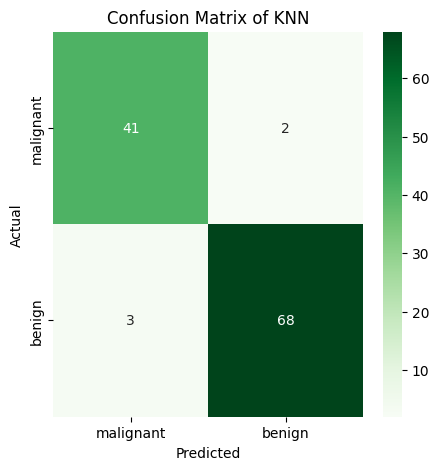

In [38]:
# Confusion matrix
cm = confusion_matrix(Y_test,Y_pred_knn)

# Display the confusion matix using Seaborn heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of KNN')
plt.show()

In [39]:
# Classification report
knn_report = classification_report(Y_test, Y_pred_knn,  output_dict=True)
knn_report_df = pd.DataFrame(knn_report).transpose()
print("Classification Report of KNN:")
display(knn_report_df)

Classification Report of KNN:


,precision,recall,f1-score,support
0,0.931818,0.953488,0.942529,43.00000
1,0.971429,0.957746,0.964539,71.00000
accuracy,0.956140,0.956140,0.956140,0.95614
macro avg,0.951623,0.955617,0.953534,114.00000
weighted avg,0.956488,0.956140,0.956237,114.00000


# 5. Naive Bayes

In [40]:
# Import library
from sklearn.naive_bayes import GaussianNB

In [41]:
# Model training
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [42]:
# Make prediction using the tes set
Y_pred_nb = nb.predict(X_test)

Evaluation

In [43]:
# Model accuracy
nb_accuracy = accuracy_score(Y_test, Y_pred_nb)
print(f'Model Accuracy: {nb_accuracy:.2f} = {nb_accuracy * 100:.2f}%')

Model Accuracy: 0.96 = 96.49%


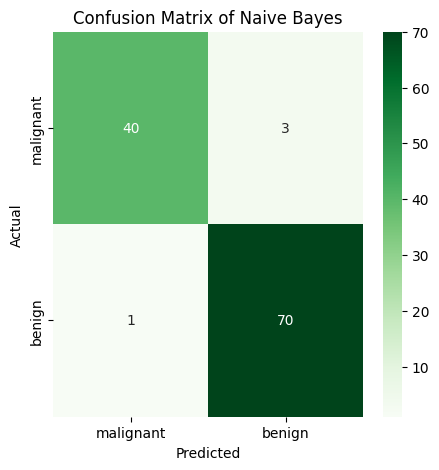

In [44]:
# Confusion matrix
cm = confusion_matrix(Y_test,Y_pred_nb)

# Display the confusion matix using Seaborn heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Naive Bayes')
plt.show()

In [45]:
# Classification report
nb_report = classification_report(Y_test, Y_pred_nb,  output_dict=True)
nb_report_df = pd.DataFrame(nb_report).transpose()
print("Classification Report of Naive Bayes:")
display(nb_report_df)

Classification Report of Naive Bayes:


,precision,recall,f1-score,support
0,0.975610,0.930233,0.952381,43.000000
1,0.958904,0.985915,0.972222,71.000000
accuracy,0.964912,0.964912,0.964912,0.964912
macro avg,0.967257,0.958074,0.962302,114.000000
weighted avg,0.965205,0.964912,0.964738,114.000000


# Comparison

In [46]:
# Comparison
models = ['SVM', 'Logistic Regression', 'Random Forest', 'KNN', 'Naive Bayes']
accuracies = [svm_accuracy, logreg_accuracy, rf_accuracy, knn_accuracy, nb_accuracy]

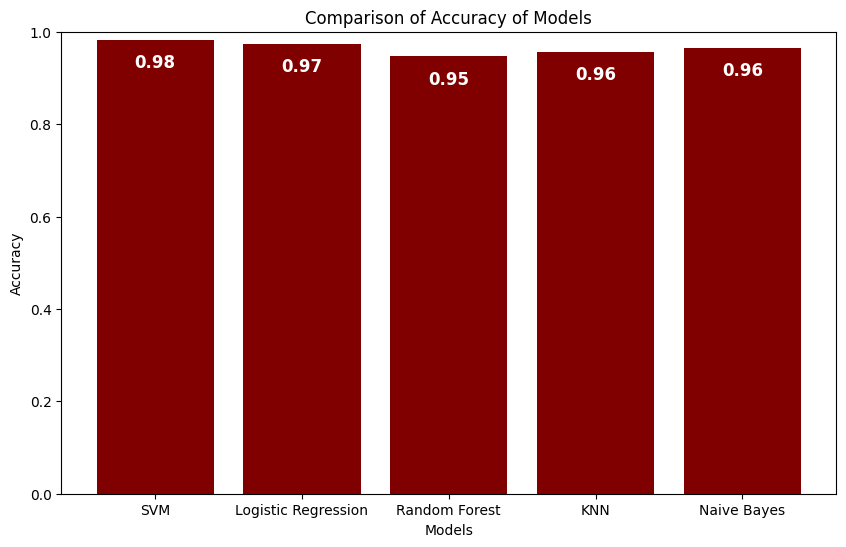

In [47]:
# Comparison accuracy plot
plt.figure(figsize=(10,6))
bars = plt.bar(models, accuracies, color='maroon')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.03,  # Kurangi nilai Y agar tetap dalam batas
             f"{yval:.2f}", ha='center', va='top', color='white', fontsize=12, fontweight='bold')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy of Models')
plt.ylim(0, 1)
plt.show()

## Analysis of The Best Model
Based on the evaluation results of the five models, it was found that the Support Vector Machine has a higher accuracy compared to the other four models, namely Logistic Regression, Random Forest, KNN, and Naive Bayes. Therefore, the next step is to conduct a misclassification analysis and overfitting vs underfitting check.

For the misclassification analysis, it can be observed through the confusion matrix of the SVM obtained earlier.

In [48]:
# Checking for underfitting or overfitting
# Checking training accuracy
Y_train_pred = logreg.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_train_pred)

# Checking testing accuracy
Y_test_pred = logreg.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

# Display the accuracy comparison results
print(f'Training data accuracy: {train_accuracy * 100:.2f}%')
print(f'Testing data accuracy: {test_accuracy * 100:.2f}%')

Training data accuracy: 98.68%
Testing data accuracy: 97.37%


The model is well-generalized, as both training (98.68%) and testing (97.37%) accuracies are high and close, indicating neither overfitting nor underfitting.

# Deployment

Prediction new data (Example)

In [49]:
# A new sample of breast cancer data
new_data = np.array([[13.2, 15.4, 85.0, 500.0, 0.1, 0.05, 1.0, 0.2, 0.1, 13.2, 0.1, 1.1, 0.0, 0.7, 1.3, 0.2, 0.3, 0.1, 0.3, 0.4, 1.0, 17.0, 30.6, 0.3, 0.5, 0.7, 1.0, 0.5, 0.6, 0.3]])  # New data point

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Predict the class of the new sample (0 = malignant, 1 = benign)
prediction = svm.predict(new_data_scaled)
print(f'Prediction: {"Malignant" if prediction[0] == 0 else "Benign"}')

Prediction: Malignant
